In [45]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets
plt.rcParams['figure.figsize'] = (16,10)

rng = np.random.default_rng(0)

from utils import KalmanFilter

In [53]:
# Dynamical system: Lorenz attractor

# Model parameters (Assumed by Lorenz)
rho = 28
sigma = 10
beta = 8/3


def f(t, y):
    return np.array([
        sigma * (y[1] - y[0]),
        y[0] * (rho - y[2]),
        y[0] * y[1] - beta * y[2]
    ])

# Initial condition based on starting at [1,1,1] and integrating to t=30
y0 = np.array([-10.04569726, -13.73820132,  25.22352555])

t = np.arange(0, 10, 0.01)

N = len(t)
dt = 0.01

sol = solve_ivp(f, t_span=(0,10), y0=y0, t_eval=t)
y = sol.y.transpose()     # Take transpose so time axis is 0
y

array([[-10.04569726, -13.73820132,  25.22352555],
       [-10.40962815, -13.98505297,  25.95971089],
       [-10.75897423, -14.15965167,  26.74738952],
       ...,
       [ 10.16844532,  10.82255622,  29.49167423],
       [ 10.22236738,  10.65492295,  29.79633433],
       [ 10.25379643,  10.4563926 ,  30.07938321]])

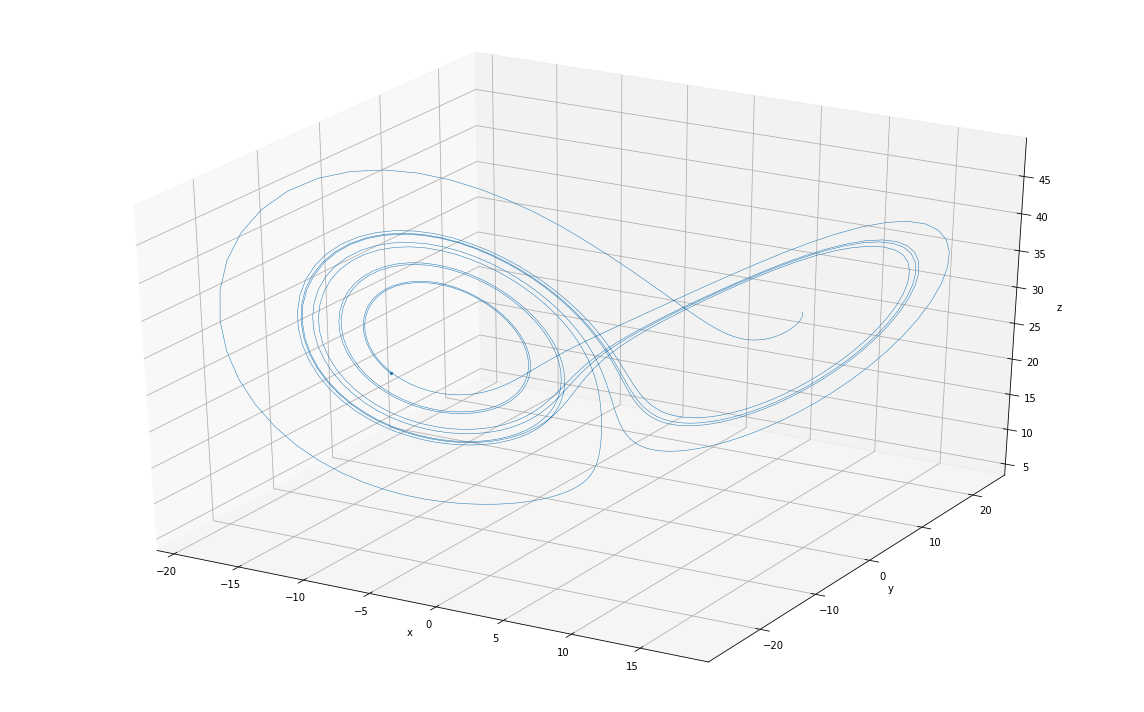

In [54]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(y[:, 0], y[:, 1], y[:, 2] ,lw=0.5)
ax.scatter(y[0,0], y[0, 1], y[0, 2], marker='.')
ax.set(xlabel='x', ylabel='y', zlabel='z');
fig.tight_layout()

In [55]:
def plot(i):
    ax = plt.gca(projection='3d')
    ax.plot(y[0:i, 0], y[0:i, 1], y[0:i, 2] ,lw=0.5)
    ax.set_xlim(-21, 20)
    ax.set_ylim(-25, 25)
    ax.set_zlim(0, 50)
    fig = plt.gcf()
    fig.tight_layout()

num_records = np.shape(y)[0]
ipywidgets.interact(plot, i=(0, num_records-1, 1));


interactive(children=(IntSlider(value=499, description='i', max=999), Output()), _dom_classes=('widget-interac…

In [56]:
# Add noise to true y
noise = rng.multivariate_normal(mean=np.zeros(3), cov=0.5*np.eye(3), size=N)
obs = y + noise

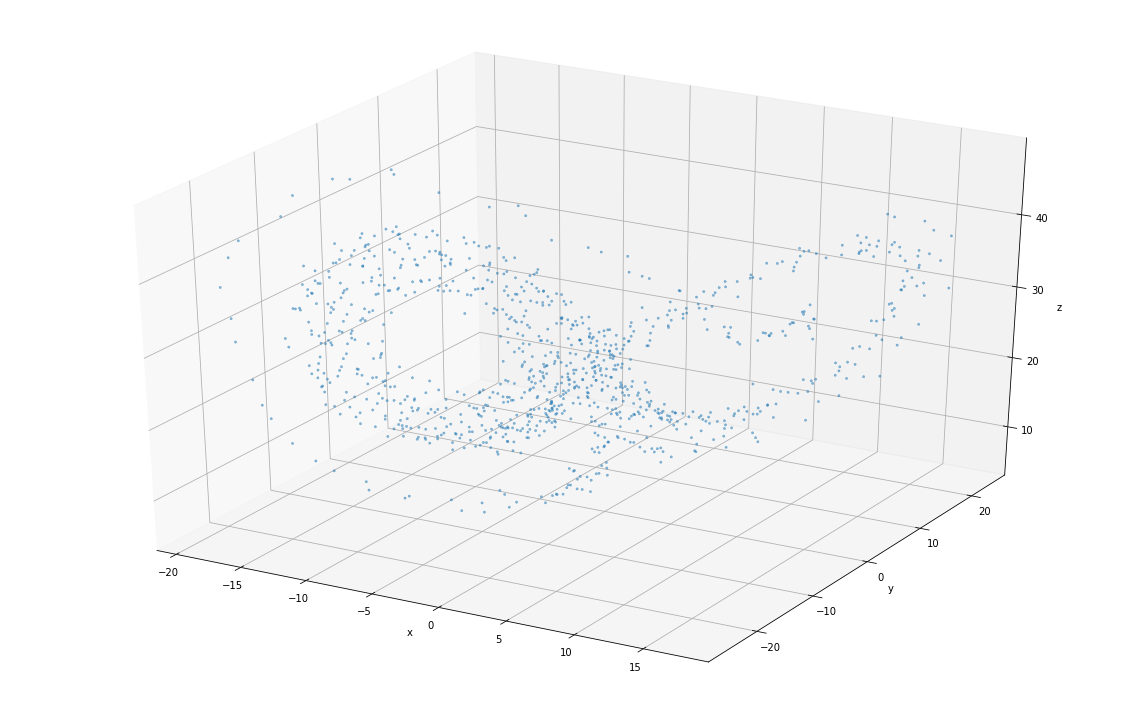

In [57]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(obs[:, 0], obs[:, 1], obs[:, 2] , lw=0.5, alpha=0.5, s=5)
ax.set(xlabel='x', ylabel='y', zlabel='z');
fig.tight_layout()

In [58]:
accels = np.zeros((N,3))

for i in range(1, N-1):
    for j in range(3):
        accels[i,j] = (y[i+1, j] - 2*y[i,j] + y[i-1, j])/dt**2
np.mean(accels, axis=0)

array([ 3.95359932,  0.483213  , -4.53136464])

In [59]:
kf = KalmanFilter(dt, y0, [3, 0.5, -4])

In [60]:
forecasts = []
updates = []

for i in range(1000):
    forecasts.append(kf.forecast())
    updates.append(kf.update(obs[i, :]))
    
forecasts = np.array(forecasts)
updates = np.array(updates)

In [61]:
np.array(updates)

array([[-10.22878075, -13.86800461,  24.63885513],
       [-10.69843219, -13.91588591,  24.61001476],
       [-10.69275648, -13.80149215,  26.5341151 ],
       ...,
       [ 10.05975379,  11.72860954,  29.70651915],
       [ 10.1164487 ,  11.43365515,  29.84703854],
       [ 10.32722126,  10.77214658,  29.95598546]])

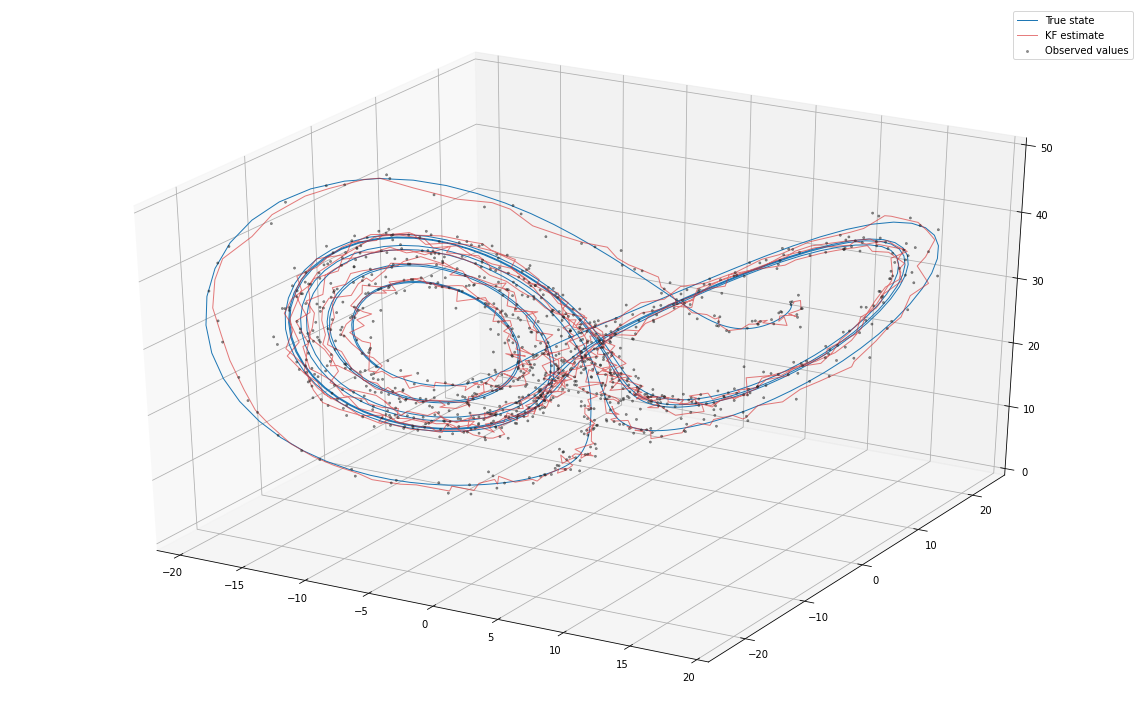

In [63]:
ax = plt.gca(projection='3d')
ax.plot(y[:, 0], y[:, 1], y[:, 2],
        lw=1, alpha=1, label='True state')
ax.scatter(obs[:, 0], obs[:, 1], obs[:, 2],
           color=(0.1,0.1,0.1), lw=0.5, alpha=0.5, s=5, label='Observed values')
ax.plot(updates[:, 0], updates[:, 1], updates[:, 2], 
        color='tab:red', lw=1, alpha=0.6, label='KF estimate')


ax.set_xlim(-21, 20)
ax.set_ylim(-25, 25)
ax.set_zlim(0, 50)

ax.legend()
fig = plt.gcf()
fig.tight_layout()

In [64]:
def plot(i):
    ax = plt.gca(projection='3d')
    
    ax.plot(y[0:i, 0], y[0:i, 1], y[0:i, 2],
            lw=1, alpha=1, label='True state')
    ax.scatter(obs[0:i, 0], obs[0:i, 1], obs[0:i, 2],
               color=(0.1,0.1,0.1), lw=0.5, alpha=0.5, s=5, label='Observed values')
    ax.plot(updates[0:i, 0], updates[0:i, 1], updates[0:i, 2], 
            color='tab:red', lw=1, alpha=0.6, label='KF estimate')
    
    
    ax.set_xlim(-21, 20)
    ax.set_ylim(-25, 25)
    ax.set_zlim(0, 50)

    ax.legend()
    fig = plt.gcf()
    fig.tight_layout()

num_records = np.shape(y)[0]
ipywidgets.interact(plot, i=(0, num_records-1, 1));

interactive(children=(IntSlider(value=499, description='i', max=999), Output()), _dom_classes=('widget-interac…